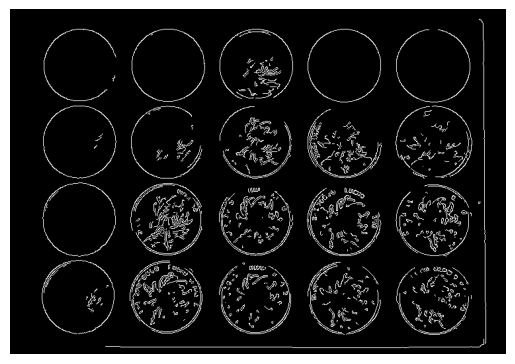

(<matplotlib.image.AxesImage at 0x7f273be5aac0>,
 (-0.5, 749.5, 520.5, -0.5),
 None)

In [74]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# img = cv2.imread("./img/coin.png", cv2.IMREAD_GRAYSCALE)
img = cv2.imread("./img/coins3.jpg", cv2.IMREAD_GRAYSCALE)

edges = cv2.Canny(img, 450, 900)

# plt.figure(figsize=(20, 16))
plt.imshow(edges, "gray"), plt.axis("off"), plt.show()

(521, 750)
(1, 9, 3)
(521, 750, 3)
[372 318  51]
[236 436  52]
[504 436  55]
[370 436  54]
[238 316  53]
[504 322  51]
[372 200  53]
[640 438  51]
[642 320  51]


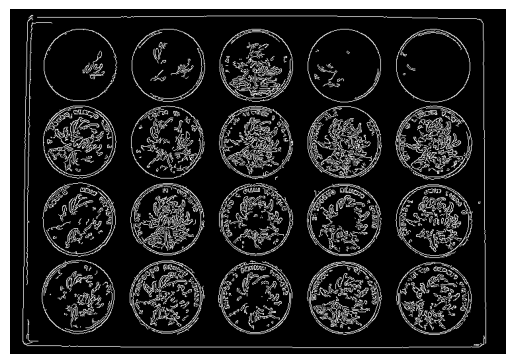

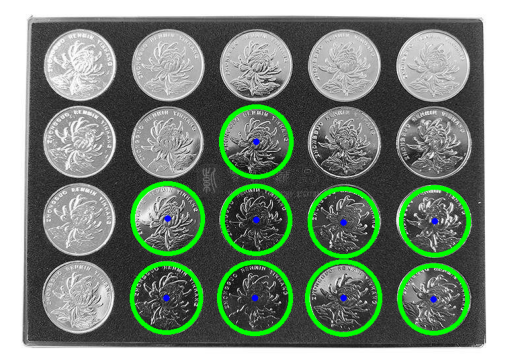

(<matplotlib.image.AxesImage at 0x7f273bad54f0>,
 (-0.5, 749.5, 520.5, -0.5),
 None)

In [72]:
circles = cv2.HoughCircles(
    img,
    cv2.HOUGH_GRADIENT,
    dp=1,  # 图像分辨率和累加器分辨率比
    minDist=50,  # 被检测的圆心之间的最小距离
    param1=900,  # 传递给canny中的较高的阈值,低阈值是高阈值的一半
    param2=76,  # 检测阶段圆心的投票阈值，越小，错误的圆越多
    minRadius=40,  # 最小圆半径
    maxRadius=0,  # 最大圆半径
)
print(img.shape)
print(circles.shape)
circles = np.uint16(np.around(circles))
img_c = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
print(img_c.shape)
for i in circles[0, :]:
    print(i)
    # draw the outer circle
    cv2.circle(img_c, (i[0], i[1]), i[2], (0, 255, 0), 5)
    # draw the center of the circle
    cv2.circle(img_c, (i[0], i[1]), 2, (0, 0, 255), 5)

# plt.imshow(img, "gray"), plt.axis("off"), plt.show()
plt.imshow(edges, "gray"), plt.axis("off"), plt.show()
plt.imshow(img_c, "gray"), plt.axis("off"), plt.show()

上面是opencv实现面对稍复杂图片的情况，可以发现没有全部识别出来

1. 可能背景的问题，调参总是调整不好能同时识别所有硬币的参数，导致只有接近一半的圆识别出来（调小投票数量能识别更多，但是也会出现很多杂乱误识别的圆，调高识别的圆会变少）
2. 也有可能是因为做了迟滞阈值法，导致多余的边缘被认为是圆的一部分。